# Regression with neural Network using TensorFlow


In [1]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.12.0


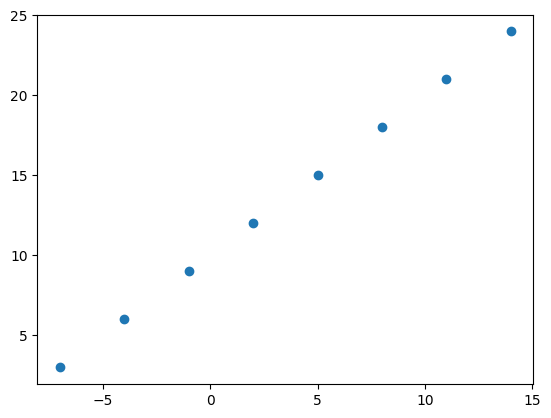

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7, -4, -1, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

# Input and Output Shapes

In [10]:
# Demo tensor for our housing price prediction problem

house_info = tf.constant(['bedroom', 'batheoom', 'garage'])
house_price = tf.constant([12904])

house_info, house_price
# here there is a difference for input and output shape

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'batheoom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([12904])>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [13]:
X[0].ndim
#it has 0 dim, so it has no shape

0

In [21]:
#turn out numpy to tensor
X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

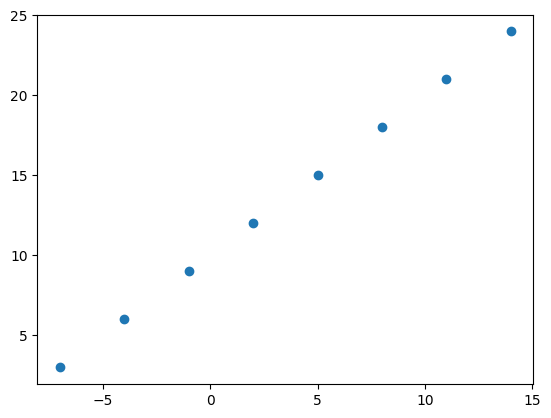

In [16]:
plt.scatter(X, y)

# Modelling

In [18]:
# set random seed
tf.random.set_seed(7)

In [53]:
# set random seed
tf.random.set_seed(42)
# 1. Create a model using the Sequential API
# we can use add method to add layers or put into the list as below
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mean absolute error
             optimizer=tf.keras.optimizers.SGD(), #stochastic gradient descent
             metrics = ['mae'])

#fit the model

model.fit(
    tf.expand_dims(X, axis=-1), # for avoid shape error, Input 0 of layer "dense" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    y,
    epochs = 100
)



Epoch 1/100
1/1 [==============================] - 0s 332ms/step - loss: 15.4386 - mae: 15.4386
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 15.1573 - mae: 15.1573
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 14.9099 - mae: 14.9099
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 14.7774 - mae: 14.7774
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 14.6449 - mae: 14.6449
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 14.5124 - mae: 14.5124
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 14.3799 - mae: 14.3799
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 14.2474 - mae: 14.2474
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 14.1149 - mae: 14.1149
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 13.9824 - mae: 13.9824
Epoch 11/100
1/1 [==============================] -

1/1 [==============================] - 0s 7ms/step - loss: 6.9038 - mae: 6.9038
Epoch 88/100
1/1 [==============================] - 0s 5ms/step - loss: 6.8981 - mae: 6.8981
Epoch 89/100
1/1 [==============================] - 0s 2ms/step - loss: 6.8925 - mae: 6.8925
Epoch 90/100
1/1 [==============================] - 0s 10ms/step - loss: 6.8869 - mae: 6.8869
Epoch 91/100
1/1 [==============================] - 0s 8ms/step - loss: 6.8813 - mae: 6.8813
Epoch 92/100
1/1 [==============================] - 0s 10ms/step - loss: 6.8756 - mae: 6.8756
Epoch 93/100
1/1 [==============================] - 0s 11ms/step - loss: 6.8700 - mae: 6.8700
Epoch 94/100
1/1 [==============================] - 0s 6ms/step - loss: 6.8644 - mae: 6.8644
Epoch 95/100
1/1 [==============================] - 0s 5ms/step - loss: 6.8588 - mae: 6.8588
Epoch 96/100
1/1 [==============================] - 0s 8ms/step - loss: 6.8531 - mae: 6.8531
Epoch 97/100
1/1 [==============================] - 0s 5ms/step - loss: 6.8475 -

In [54]:
model.predict([17])

1/1 [==============================] - 0s 70ms/step


array([[29.679066]], dtype=float32)

In [33]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [36]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


# improving the Model

In [64]:
# set random seed
tf.random.set_seed(42)
# 1. Create a model using the Sequential API
# we can use add method to add layers or put into the list as below
modelA = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
modelA.compile(loss=tf.keras.losses.mae, # mean absolute error
             optimizer=tf.keras.optimizers.Adam(lr = .0001), #stochastic gradient descent
             metrics = ['mae'])

#fit the model

modelA.fit(
    tf.expand_dims(X, axis=-1), # for avoid shape error, Input 0 of layer "dense" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    y,
    epochs = 100
)



Epoch 1/100
1/1 [==============================] - 1s 518ms/step - loss: 13.1884 - mae: 13.1884
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 13.1020 - mae: 13.1020
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 13.0155 - mae: 13.0155
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 12.9291 - mae: 12.9291
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 12.8426 - mae: 12.8426
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 12.7560 - mae: 12.7560
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 12.6694 - mae: 12.6694
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 12.5828 - mae: 12.5828
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 12.4961 - mae: 12.4961
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 12.4096 - mae: 12.4096
Epoch 11/100
1/1 [==============================] 

1/1 [==============================] - 0s 8ms/step - loss: 5.9927 - mae: 5.9927
Epoch 88/100
1/1 [==============================] - 0s 7ms/step - loss: 5.8956 - mae: 5.8956
Epoch 89/100
1/1 [==============================] - 0s 6ms/step - loss: 5.7950 - mae: 5.7950
Epoch 90/100
1/1 [==============================] - 0s 8ms/step - loss: 5.6964 - mae: 5.6964
Epoch 91/100
1/1 [==============================] - 0s 9ms/step - loss: 5.5970 - mae: 5.5970
Epoch 92/100
1/1 [==============================] - 0s 7ms/step - loss: 5.4969 - mae: 5.4969
Epoch 93/100
1/1 [==============================] - 0s 6ms/step - loss: 5.3959 - mae: 5.3959
Epoch 94/100
1/1 [==============================] - 0s 8ms/step - loss: 5.2942 - mae: 5.2942
Epoch 95/100
1/1 [==============================] - 0s 12ms/step - loss: 5.1917 - mae: 5.1917
Epoch 96/100
1/1 [==============================] - 0s 13ms/step - loss: 5.0884 - mae: 5.0884
Epoch 97/100
1/1 [==============================] - 0s 12ms/step - loss: 4.9843 -

In [65]:
modelA.predict([17])

1/1 [==============================] - 0s 82ms/step


array([[26.920977]], dtype=float32)

In [66]:
modelA.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 100)               200       
                                                                 
 dense_22 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [110]:
# set random seed
tf.random.set_seed(42)
# 1. Create a model using the Sequential API
# we can use add method to add layers or put into the list as below
modelB = tf.keras.Sequential([
    #tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(50, activation = None),
    #tf.keras.layers.Dense(3, activation = 'relu'),


    tf.keras.layers.Dense(1)
])

# 2. Compile the model
modelB.compile(loss=tf.keras.losses.mae, # mean absolute error
             optimizer=tf.keras.optimizers.Adam(0.01), #stochastic gradient descent
             metrics = ['mae'])

#fit the model

modelB.fit(
    tf.expand_dims(X, axis=-1), # for avoid shape error, Input 0 of layer "dense" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    y,
    epochs = 100
)



Epoch 1/100
1/1 [==============================] - 0s 481ms/step - loss: 11.9652 - mae: 11.9652
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.2458 - mae: 11.2458
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5183 - mae: 10.5183
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 9.7806 - mae: 9.7806
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 9.0304 - mae: 9.0304
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 8.2652 - mae: 8.2652
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 7.4827 - mae: 7.4827
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 6.8918 - mae: 6.8918
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 6.9803 - mae: 6.9803
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 7.2436 - mae: 7.2436
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - 

1/1 [==============================] - 0s 6ms/step - loss: 0.1964 - mae: 0.1964
Epoch 89/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2471 - mae: 0.2471
Epoch 90/100
1/1 [==============================] - 0s 10ms/step - loss: 0.1349 - mae: 0.1349
Epoch 91/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2485 - mae: 0.2485
Epoch 92/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1708 - mae: 0.1708
Epoch 93/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2581 - mae: 0.2581
Epoch 94/100
1/1 [==============================] - 0s 7ms/step - loss: 0.3015 - mae: 0.3015
Epoch 95/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2049 - mae: 0.2049
Epoch 96/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2110 - mae: 0.2110
Epoch 97/100
1/1 [==============================] - 0s 12ms/step - loss: 0.1478 - mae: 0.1478
Epoch 98/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0474 - 

In [112]:
modelB.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_83 (Dense)            (None, 50)                100       
                                                                 
 dense_84 (Dense)            (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [111]:
modelB.predict([17.0])

1/1 [==============================] - 0s 99ms/step


array([[27.179876]], dtype=float32)

# Working with a bit bigger dataset


In [149]:
X = tf.range(-100, 100, 4)
X


<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [150]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

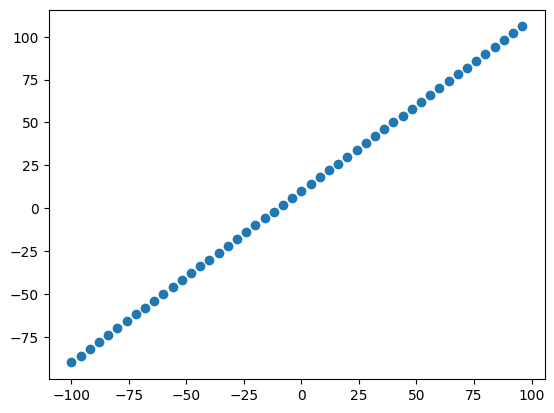

In [151]:
plt.scatter(X, y)

In [152]:
len(y)

50

In [153]:
X_train = X[:40] #1st 40 data
y_train = y[:40] 

X_test = X[40:] #rest of data
y_test = y[40:]
len(X_train), len(y_test)

(40, 10)

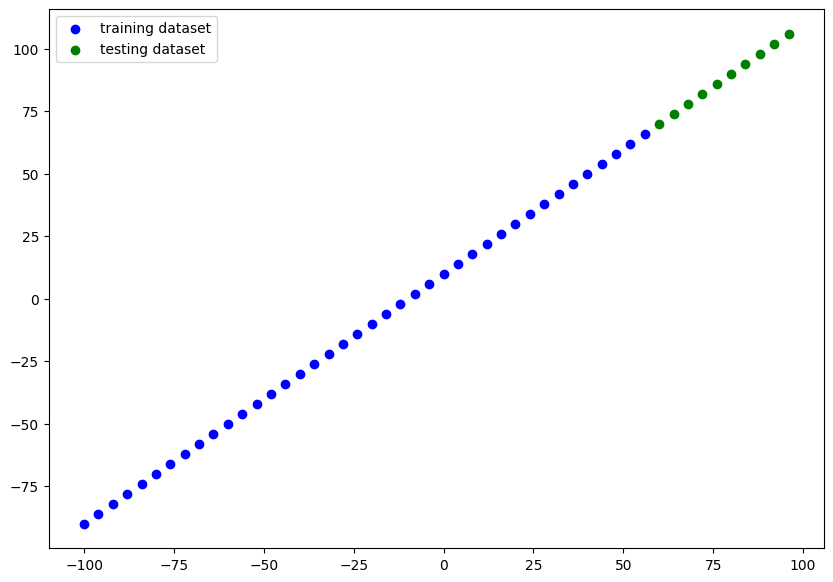

In [154]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c = 'b', label = 'training dataset')
plt.scatter(X_test, y_test, c='g', label = 'testing dataset')
plt.legend()

In [165]:
# let's bouild a model for this data
# create the model by defining the input shape arg in the first layer

model = tf.keras.Sequential([
    #tf.keras.layers.Dense(1,input_shape=[1]),

    tf.keras.layers.Dense(10,input_shape=[1], activation = 'relu'),

    tf.keras.layers.Dense(1, input_shape=[1])
], name = 'model_1')

# compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics=['mae'])

# fit the model
model.fit(
    X_train,
    y_train,
    epochs = 100
)

Epoch 1/100
2/2 [==============================] - 1s 8ms/step - loss: 29.7475 - mae: 29.7475
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 27.7362 - mae: 27.7362
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 33.4874 - mae: 33.4874
Epoch 4/100
2/2 [==============================] - 0s 13ms/step - loss: 19.3813 - mae: 19.3813
Epoch 5/100
2/2 [==============================] - 0s 15ms/step - loss: 20.2737 - mae: 20.2737
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 13.4838 - mae: 13.4838
Epoch 7/100
2/2 [==============================] - 0s 13ms/step - loss: 13.0660 - mae: 13.0660
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 10.4410 - mae: 10.4410
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 29.6306 - mae: 29.6306
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 15.6897 - mae: 15.6897
Epoch 11/100
2/2 [==============================] - 0s

2/2 [==============================] - 0s 5ms/step - loss: 12.0431 - mae: 12.0431
Epoch 88/100
2/2 [==============================] - 0s 1ms/step - loss: 10.2872 - mae: 10.2872
Epoch 89/100
2/2 [==============================] - 0s 6ms/step - loss: 6.8120 - mae: 6.8120
Epoch 90/100
2/2 [==============================] - 0s 8ms/step - loss: 15.6331 - mae: 15.6331
Epoch 91/100
2/2 [==============================] - 0s 5ms/step - loss: 11.6132 - mae: 11.6132
Epoch 92/100
2/2 [==============================] - 0s 6ms/step - loss: 9.1521 - mae: 9.1521
Epoch 93/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0954 - mae: 9.0954
Epoch 94/100
2/2 [==============================] - 0s 15ms/step - loss: 12.3980 - mae: 12.3980
Epoch 95/100
2/2 [==============================] - 0s 10ms/step - loss: 15.6152 - mae: 15.6152
Epoch 96/100
2/2 [==============================] - 0s 11ms/step - loss: 7.9869 - mae: 7.9869
Epoch 97/100
2/2 [==============================] - 0s 12ms/step - l

In [166]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_115 (Dense)           (None, 10)                20        
                                                                 
 dense_116 (Dense)           (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [158]:
from tensorflow.keras.utils import plot_model
plot_model(model=model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [159]:
from tensorflow.keras.utils import plot_model
plot_model(model=model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [167]:
prediction = model.predict(X_test)

1/1 [==============================] - 0s 120ms/step


In [168]:
prediction

array([[58.32114 ],
       [62.164997],
       [66.00885 ],
       [69.8527  ],
       [73.696556],
       [77.540405],
       [81.384254],
       [85.2281  ],
       [89.07196 ],
       [92.91581 ]], dtype=float32)

In [169]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

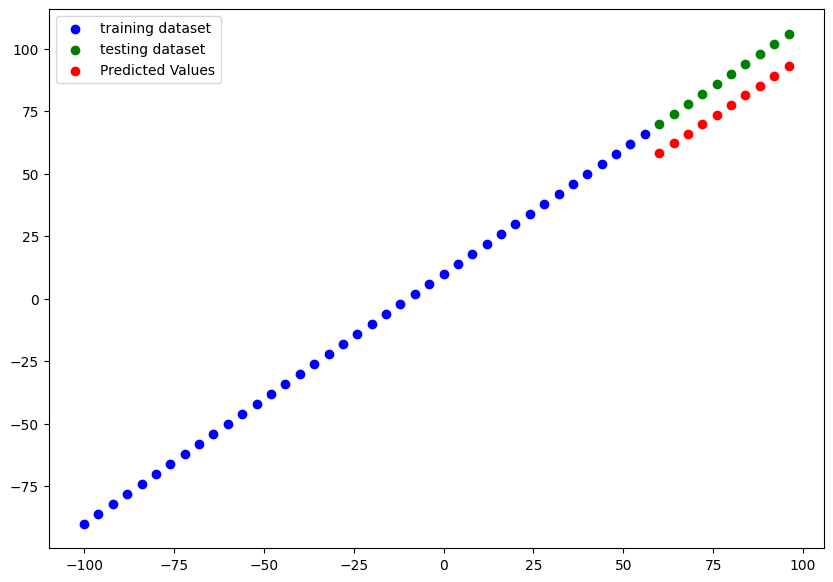

In [170]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c = 'b', label = 'training dataset')
plt.scatter(X_test, y_test, c='g', label = 'testing dataset')
plt.scatter(X_test, prediction, c = 'r', label = 'Predicted Values')
plt.legend()

In [171]:
# let's Rebouild a model for this data
# create the model by defining the input shape arg in the first layer

model = tf.keras.Sequential([
    #tf.keras.layers.Dense(1,input_shape=[1]),

    tf.keras.layers.Dense(100,input_shape=[1], activation = 'relu'),

    tf.keras.layers.Dense(1, input_shape=[1])
], name = 'model_1')

# compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics=['mae'])

# fit the model
model.fit(
    X_train,
    y_train,
    epochs = 100
)

Epoch 1/100
2/2 [==============================] - 1s 10ms/step - loss: 37.4020 - mae: 37.4020
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 19.8935 - mae: 19.8935
Epoch 3/100
2/2 [==============================] - 0s 15ms/step - loss: 14.8714 - mae: 14.8714
Epoch 4/100
2/2 [==============================] - 0s 17ms/step - loss: 7.2818 - mae: 7.2818
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 11.5857 - mae: 11.5857
Epoch 6/100
2/2 [==============================] - 0s 14ms/step - loss: 8.9356 - mae: 8.9356
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 12.9681 - mae: 12.9681
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 14.4137 - mae: 14.4137
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 21.9382 - mae: 21.9382
Epoch 10/100
2/2 [==============================] - 0s 18ms/step - loss: 9.7116 - mae: 9.7116
Epoch 11/100
2/2 [==============================] - 0s 8m

2/2 [==============================] - 0s 8ms/step - loss: 12.2362 - mae: 12.2362
Epoch 88/100
2/2 [==============================] - 0s 8ms/step - loss: 10.5006 - mae: 10.5006
Epoch 89/100
2/2 [==============================] - 0s 6ms/step - loss: 6.8244 - mae: 6.8244
Epoch 90/100
2/2 [==============================] - 0s 9ms/step - loss: 15.5433 - mae: 15.5433
Epoch 91/100
2/2 [==============================] - 0s 10ms/step - loss: 11.8298 - mae: 11.8298
Epoch 92/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4203 - mae: 9.4203
Epoch 93/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0590 - mae: 9.0590
Epoch 94/100
2/2 [==============================] - 0s 6ms/step - loss: 12.2748 - mae: 12.2748
Epoch 95/100
2/2 [==============================] - 0s 7ms/step - loss: 15.9483 - mae: 15.9483
Epoch 96/100
2/2 [==============================] - 0s 17ms/step - loss: 8.1812 - mae: 8.1812
Epoch 97/100
2/2 [==============================] - 0s 16ms/step - lo

In [176]:
prediction = model.predict(X_test)
prediction

1/1 [==============================] - 0s 46ms/step


array([[58.20425 ],
       [62.038616],
       [65.872986],
       [69.70735 ],
       [73.54171 ],
       [77.376076],
       [81.210434],
       [85.04471 ],
       [88.87901 ],
       [92.7133  ]], dtype=float32)

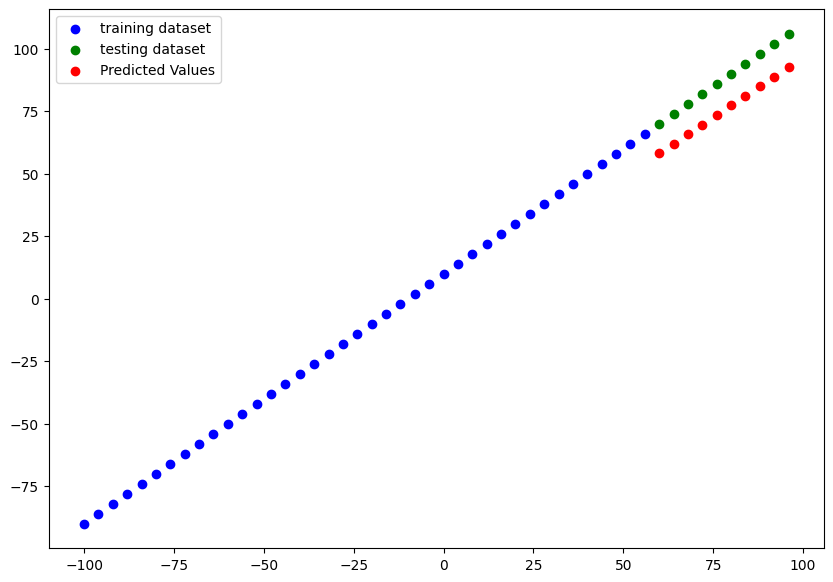

In [174]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c = 'b', label = 'training dataset')
plt.scatter(X_test, y_test, c='g', label = 'testing dataset')
plt.scatter(X_test, prediction, c = 'r', label = 'Predicted Values')
plt.legend()

In [185]:
# let's Rebouild a model for this data
# create the model by defining the input shape arg in the first layer

model = tf.keras.Sequential([
    #tf.keras.layers.Dense(1,input_shape=[1]),

    tf.keras.layers.Dense(50,input_shape=[1], activation = None),

    tf.keras.layers.Dense(1, input_shape=[1])
], name = 'model_1')

# compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics=['mae'])

# fit the model
model.fit(
    X_train,
    y_train,
    epochs = 100
)

Epoch 1/100
2/2 [==============================] - 1s 15ms/step - loss: 50.4641 - mae: 50.4641
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 27.6610 - mae: 27.6610
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 31.7450 - mae: 31.7450
Epoch 4/100
2/2 [==============================] - 0s 16ms/step - loss: 13.5772 - mae: 13.5772
Epoch 5/100
2/2 [==============================] - 0s 13ms/step - loss: 18.4323 - mae: 18.4323
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 9.2984 - mae: 9.2984
Epoch 7/100
2/2 [==============================] - 0s 16ms/step - loss: 10.3082 - mae: 10.3082
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 11.2459 - mae: 11.2459
Epoch 9/100
2/2 [==============================] - 0s 14ms/step - loss: 42.2788 - mae: 42.2788
Epoch 10/100
2/2 [==============================] - 0s 15ms/step - loss: 29.4415 - mae: 29.4415
Epoch 11/100
2/2 [==============================] - 

2/2 [==============================] - 0s 5ms/step - loss: 19.2000 - mae: 19.2000
Epoch 88/100
2/2 [==============================] - 0s 6ms/step - loss: 29.5827 - mae: 29.5827
Epoch 89/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1404 - mae: 10.1404
Epoch 90/100
2/2 [==============================] - 0s 2ms/step - loss: 21.3266 - mae: 21.3266
Epoch 91/100
2/2 [==============================] - 0s 10ms/step - loss: 10.5253 - mae: 10.5253
Epoch 92/100
2/2 [==============================] - 0s 8ms/step - loss: 18.2202 - mae: 18.2202
Epoch 93/100
2/2 [==============================] - 0s 8ms/step - loss: 6.8094 - mae: 6.8094
Epoch 94/100
2/2 [==============================] - 0s 7ms/step - loss: 13.0145 - mae: 13.0145
Epoch 95/100
2/2 [==============================] - 0s 8ms/step - loss: 18.4115 - mae: 18.4115
Epoch 96/100
2/2 [==============================] - 0s 14ms/step - loss: 10.3504 - mae: 10.3504
Epoch 97/100
2/2 [==============================] - 0s 10ms/ste

In [187]:
prediction=model.predict(X_test)
prediction, y_test

1/1 [==============================] - 0s 49ms/step


(array([[ 78.33572 ],
        [ 83.43885 ],
        [ 88.54198 ],
        [ 93.64512 ],
        [ 98.74825 ],
        [103.85139 ],
        [108.95451 ],
        [114.05765 ],
        [119.160774],
        [124.2639  ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>)

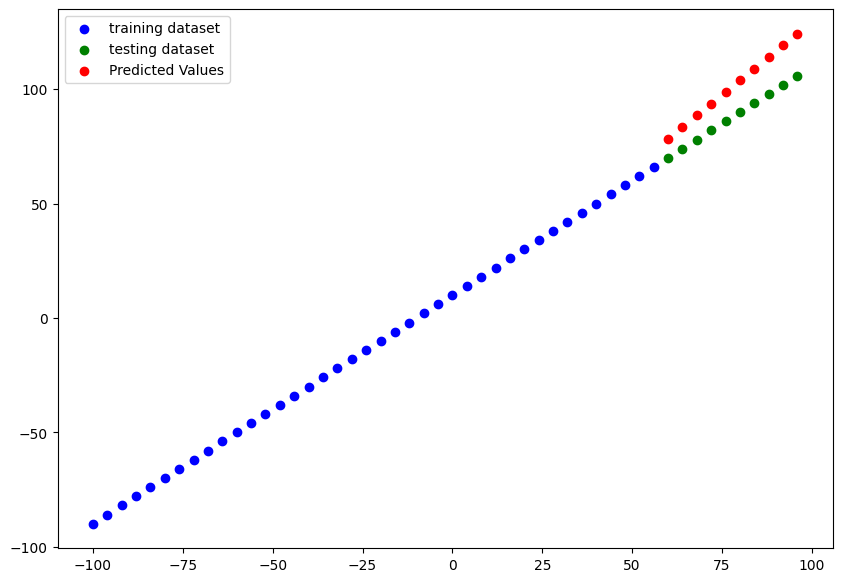

In [188]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c = 'b', label = 'training dataset')
plt.scatter(X_test, y_test, c='g', label = 'testing dataset')
plt.scatter(X_test, prediction, c = 'r', label = 'Predicted Values')
plt.legend()

In [226]:
# let's Rebouild a model for this data
# create the model by defining the input shape arg in the first layer

model = tf.keras.Sequential([
    #tf.keras.layers.Dense(1,input_shape=[1]),

    tf.keras.layers.Dense(100,input_shape=[1], activation =None),
    tf.keras.layers.Dense(100,input_shape=[1], activation =None),


    tf.keras.layers.Dense(1, input_shape=[1])
], name = 'model_1')

# compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(lr=0.001),
             metrics=['mae'])

# fit the model
model.fit(
    X_train,
    y_train,
    epochs = 100
)

Epoch 1/100
2/2 [==============================] - 1s 10ms/step - loss: 31.4086 - mae: 31.4086
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 18.0916 - mae: 18.0916
Epoch 3/100
2/2 [==============================] - 0s 17ms/step - loss: 8.3502 - mae: 8.3502
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 12.4959 - mae: 12.4959
Epoch 5/100
2/2 [==============================] - 0s 15ms/step - loss: 15.4686 - mae: 15.4686
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 15.5937 - mae: 15.5937
Epoch 7/100
2/2 [==============================] - 0s 19ms/step - loss: 13.4340 - mae: 13.4340
Epoch 8/100
2/2 [==============================] - 0s 13ms/step - loss: 10.4054 - mae: 10.4054
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 8.1348 - mae: 8.1348
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.4249 - mae: 10.4249
Epoch 11/100
2/2 [==============================] - 0s 1

2/2 [==============================] - 0s 8ms/step - loss: 4.5520 - mae: 4.5520
Epoch 89/100
2/2 [==============================] - 0s 0s/step - loss: 2.8915 - mae: 2.8915
Epoch 90/100
2/2 [==============================] - 0s 9ms/step - loss: 3.3033 - mae: 3.3033
Epoch 91/100
2/2 [==============================] - 0s 6ms/step - loss: 2.6274 - mae: 2.6274
Epoch 92/100
2/2 [==============================] - 0s 11ms/step - loss: 2.7062 - mae: 2.7062
Epoch 93/100
2/2 [==============================] - 0s 8ms/step - loss: 3.0251 - mae: 3.0251
Epoch 94/100
2/2 [==============================] - 0s 11ms/step - loss: 1.8431 - mae: 1.8431
Epoch 95/100
2/2 [==============================] - 0s 8ms/step - loss: 3.0341 - mae: 3.0341
Epoch 96/100
2/2 [==============================] - 0s 8ms/step - loss: 1.3513 - mae: 1.3513
Epoch 97/100
2/2 [==============================] - 0s 13ms/step - loss: 1.8146 - mae: 1.8146
Epoch 98/100
2/2 [==============================] - 0s 8ms/step - loss: 1.1053 - 

In [227]:
prediction = model.predict(X_test)
prediction, y_test

1/1 [==============================] - 0s 121ms/step


(array([[ 71.12523 ],
        [ 75.22849 ],
        [ 79.33176 ],
        [ 83.43501 ],
        [ 87.538284],
        [ 91.64153 ],
        [ 95.744804],
        [ 99.84804 ],
        [103.95131 ],
        [108.054565]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>)

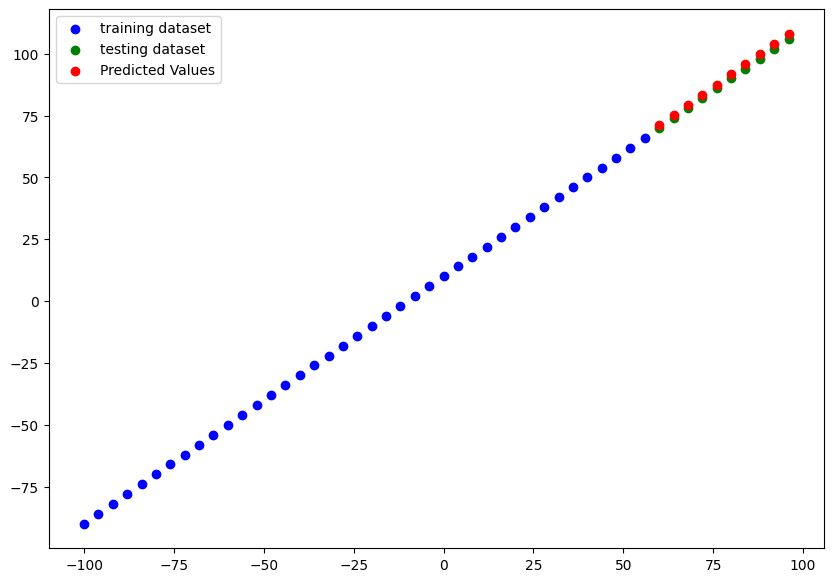

In [228]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c = 'b', label = 'training dataset')
plt.scatter(X_test, y_test, c='g', label = 'testing dataset')
plt.scatter(X_test, prediction, c = 'r', label = 'Predicted Values')
plt.legend()

In [232]:
model.predict([5])

1/1 [==============================] - 0s 75ms/step


array([[14.705443]], dtype=float32)

In [233]:
lol = model.predict(X)
lol, X

2/2 [==============================] - 0s 6ms/step


(array([[-93.00511  ],
        [-88.90184  ],
        [-84.798584 ],
        [-80.69533  ],
        [-76.59207  ],
        [-72.48881  ],
        [-68.38555  ],
        [-64.28229  ],
        [-60.17903  ],
        [-56.07577  ],
        [-51.972515 ],
        [-47.86926  ],
        [-43.765995 ],
        [-39.66274  ],
        [-35.559483 ],
        [-31.456224 ],
        [-27.352964 ],
        [-23.249702 ],
        [-19.146446 ],
        [-15.043186 ],
        [-10.939926 ],
        [ -6.836669 ],
        [ -2.7334108],
        [  1.3698481],
        [  5.473107 ],
        [  9.5763645],
        [ 13.679625 ],
        [ 17.782883 ],
        [ 21.88614  ],
        [ 25.989399 ],
        [ 30.092657 ],
        [ 34.19592  ],
        [ 38.29917  ],
        [ 42.402435 ],
        [ 46.50569  ],
        [ 50.60895  ],
        [ 54.712208 ],
        [ 58.81547  ],
        [ 62.91872  ],
        [ 67.02198  ],
        [ 71.12523  ],
        [ 75.22849  ],
        [ 79.33176  ],
        [ 8

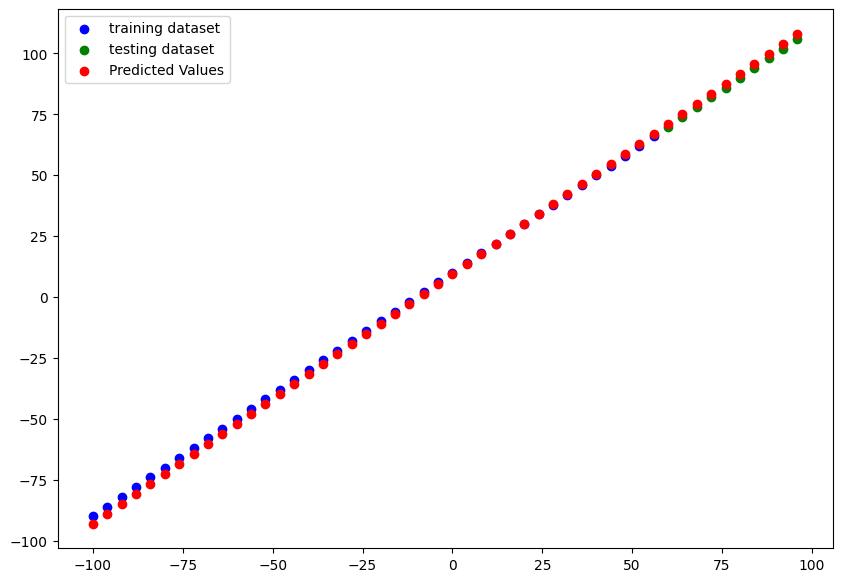

In [235]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c = 'b', label = 'training dataset')
plt.scatter(X_test, y_test, c='g', label = 'testing dataset')
plt.scatter(X, lol, c = 'r', label = 'Predicted Values')
plt.legend()

In [237]:
y_pred = model.predict(X_test)
y_pred, y_test

1/1 [==============================] - 0s 49ms/step


(array([[ 71.12523 ],
        [ 75.22849 ],
        [ 79.33176 ],
        [ 83.43501 ],
        [ 87.538284],
        [ 91.64153 ],
        [ 95.744804],
        [ 99.84804 ],
        [103.95131 ],
        [108.054565]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>)

In [240]:
# Calculate mean Square Errors
mse = tf.metrics.mean_squared_error(y_test, y_pred)
mse

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([416.75787, 295.11142, 207.13843, 152.83911, 132.21318, 145.26077,
       191.98201, 272.37598, 386.44427, 534.18555], dtype=float32)>

In [246]:
# We shoul do squeeze here, bcz of different shape
y_pred = tf.squeeze(y_pred)
y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 71.12523 ,  75.22849 ,  79.33176 ,  83.43501 ,  87.538284,
        91.64153 ,  95.744804,  99.84804 , 103.95131 , 108.054565],
      dtype=float32)>

In [247]:
# Calculate mean Square Errors
mse = tf.metrics.mean_squared_error(y_test, y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=2.6157553>

In [250]:
# Calculation of mean absolute error
mae = tf.metrics.mean_absolute_error(y_test, y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.5899025>

In [255]:
# Calcualte huber
huber = tf.metrics.Huber(y_test, y_pred)
huber

AttributeError: module 'keras.api._v2.keras.metrics' has no attribute 'Huber'

In [256]:
# Calcualte huber
huber = tf.keras.losses.Huber(y_test, y_pred).numpy()
huber

TypeError: Cannot convert 'auto' to EagerTensor of dtype float